# Tarea 1
## Ejercicios Práctica Regresión  
**Dayana Gonzalez y Maria Fernanda Rodriguez**

1. Cargue el dataset `Auto.csv`
  1. Use la librería de `statsmodels` (específicamente `import statsmodels.formula.api as smf` y luego `smf.ols`) para realizar una regresión lineal simple con *mpg* como la variable respuesta y *horsepower* como el predictor (o descriptor). Use el método `summary()` para mostrar los resultados. Comente lo siguiente sobre los resultados:

    1. ¿Existe una relación entre el predictor y la respuesta?
    2. ¿Qué tan fuerte es la relación entre el predictor y la respuesta?
    3. ¿La relación entre el predictor y la respuesta es positiva o negativa?
    4. ¿Cuál es el *mpg* previsto asociado con una *horsepower* de 98? ¿Cuáles son los intervalos de confianza y predicción del 95% asociados?

  2. Grafique la respuesta vs el predictor. Use `seaborn` y/o `matplotlib` para mostrar la línea de regresión de mínimos cuadrados.
  
Sugerencia: para evitar inconvenientes con los missing values que se encuentran como "?", lea de la siguiente forma el dataset:

```python
    auto = pd.read_csv("Data/Auto.csv", na_values='?')
```

In [1]:
#importamos librerias
import statsmodels.formula.api as smf

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

auto = pd.read_csv("Auto.csv", na_values='?')
auto = auto.replace(np.inf, np.nan).replace(-np.inf, np.nan).dropna()
#visualizacion del dataset
auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino


In [2]:
est = smf.ols('mpg ~ horsepower', auto).fit()
est.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,39.9359,0.717,55.660,0.000,38.525,41.347
horsepower,-0.1578,0.006,-24.489,0.000,-0.171,-0.145


**¿Existe una relación entre el predictor y la respuesta?**  
Si existe, ya que podemos rechazar la hipotesis nula pues tenemos un valor p muy pequeño de casi 0, lo que significa que si existe una relación entre el predictor(horsepower) y la respuesta(mpg).  
**¿Qué tan fuerte es la relación entre el predictor y la respuesta?**  
Teniendo en cuenta que el coeficiente del predictor horsepower(β1) es de -0.1578, sabemos que por cada unidad que se aumentan los caballos de fuerza, se disminuye en promedio un 0.1578 millas por galon, con lo cual concluimos que si hay una relacion fuerte ya que la respuesta se ve afectada por el cambio en el predictor.  
**¿La relación entre el predictor y la respuesta es positiva o negativa?**  
Debido a lo mencionado anteriormente la relacion es negativa ya que cuando el horsepower aumenta se disminuye el mpg.  

**¿Cuál es el mpg previsto asociado con una horsepower de 98?**    

In [3]:
# Calculando manualmente
est.params[0] + est.params[1]*98

24.467077152512424


El mpg previsto para un horsepower de 98 es de 24.46707

**¿Cuáles son los intervalos de confianza y predicción del 95% asociados?**  
Para β0 tenemos un intervalo de confianza y prediccion de [38.525 , 41.347]  
Para β1 tenemos un intervalo de confianza y prediccion de [-0.171 ,	-0.145]

**B. Grafique la respuesta vs el predictor. Use `seaborn` y/o `matplotlib` para mostrar la línea de regresión de mínimos cuadrados.**  

C:\Users\Mafecita\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


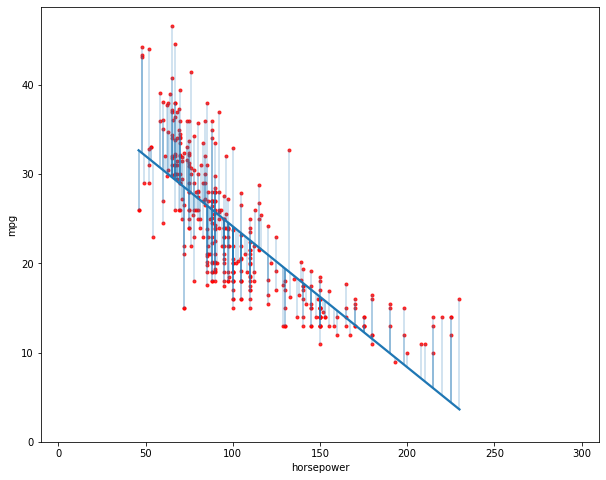

In [4]:
fit = np.polyfit(auto['horsepower'], auto['mpg'], deg=1)
y_hat = fit[1] + auto['horsepower'] * fit[0]

plt.figure(figsize=(10, 8))

sns.regplot(auto['horsepower'],auto['mpg'], order=1, ci=None, scatter_kws={'color':'r', 's':9})
plt.xlim(-10,310)
plt.ylim(bottom=0);

plt.vlines(auto['horsepower'], y_hat, auto['mpg'], lw = .4);


2. Reproduzca el análisis hecho en el notebook `Regresion-Lineal-Scikit-Learn.ipynb` para el dataset de boston completo. Para cargar el dataset (que viene por defecto en scikit-learn) ejecute:
 
 ```python

    from sklearn.datasets import load_boston
    import pandas as pd

    boston = load_boston()
    print(boston.DESCR)

    df = pd.DataFrame(boston.data, columns=boston.feature_names)
    df['MEDV'] = boston.target
    df.head()

 ```
 
 Tenga presente que los nombres de los predictores son diferentes al del ejemplo. Las variables están en proporciones (por ejm de 1000). Por ejemplo, la variable respuesta anteriormente se llamaba *Price*, ahora es *MEDV*.

In [5]:
from sklearn.datasets import load_boston
import pandas as pd

#variable respuesta MEDV
    
boston = load_boston()
print(boston.DESCR)

df = pd.DataFrame(boston.data, columns=boston.feature_names)
df['MEDV'] = boston.target
df.head()


.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [7]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [8]:
df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

### Gráficas informativas:

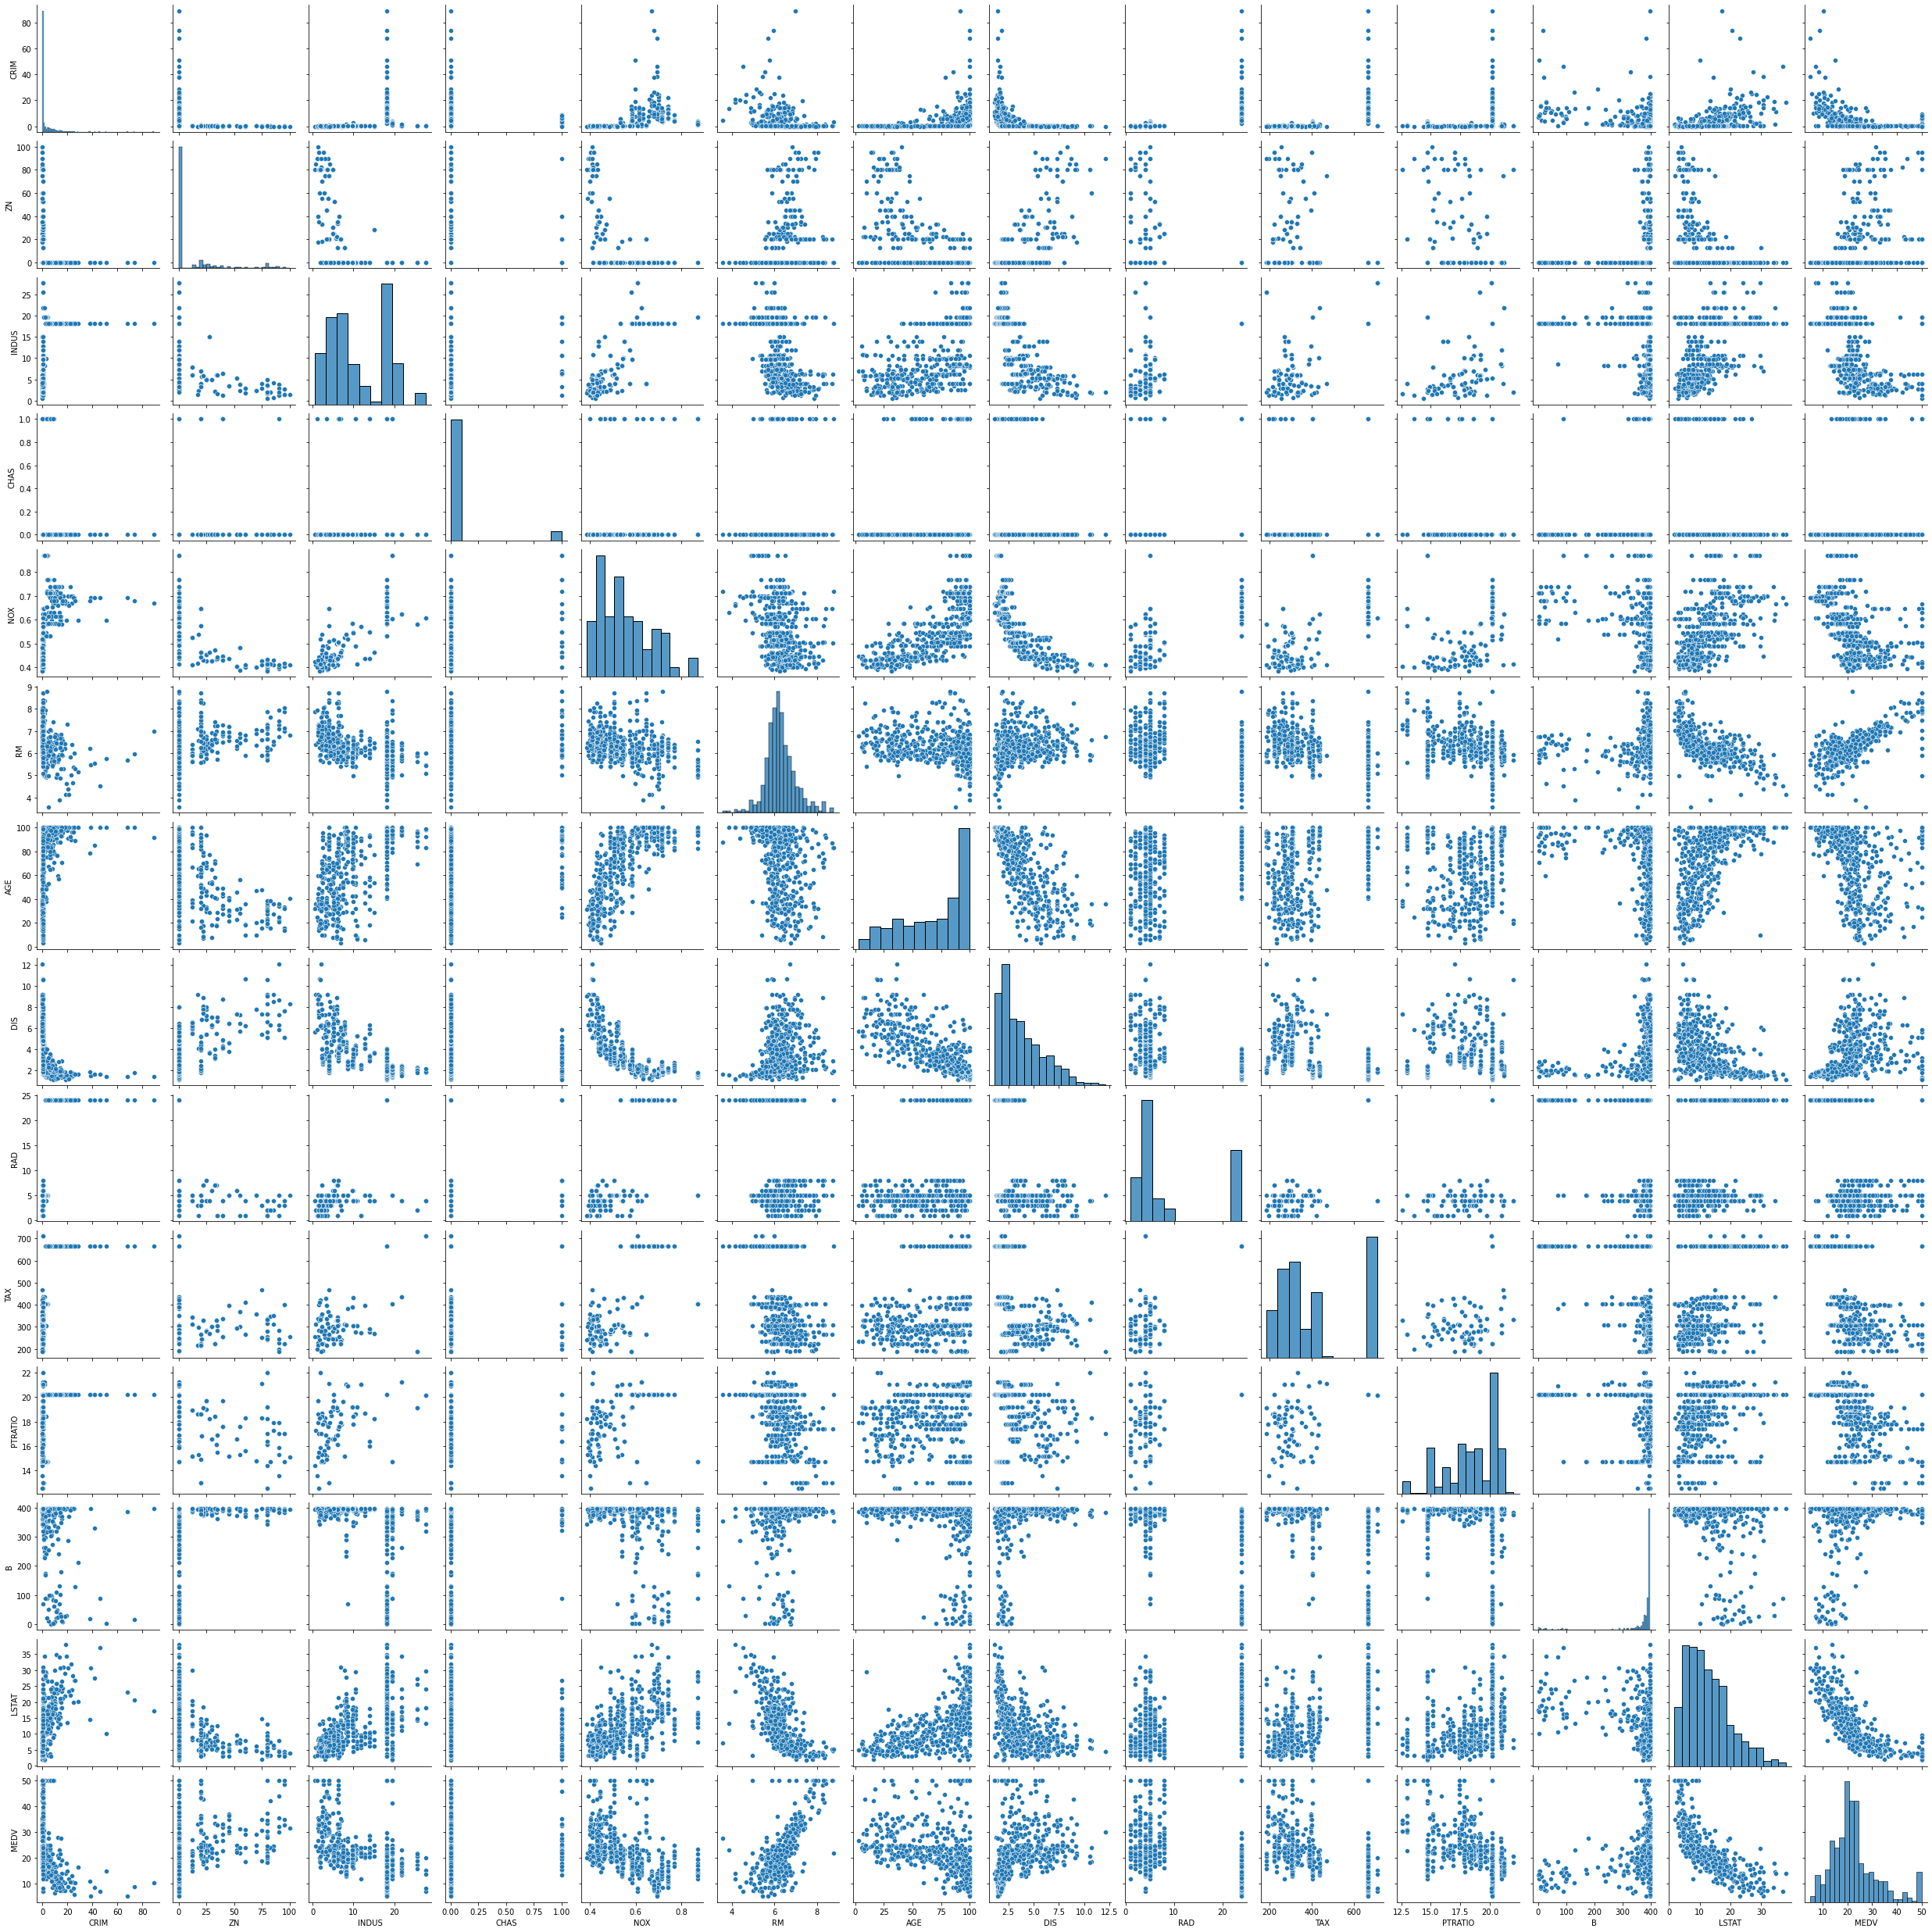

In [9]:
sns.pairplot(df)

C:\Users\Mafecita\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='MEDV', ylabel='Density'>

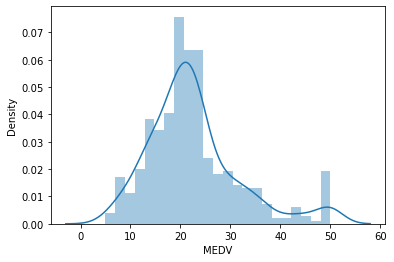

In [10]:
sns.distplot(df['MEDV'])

**Matriz de correlacion:**

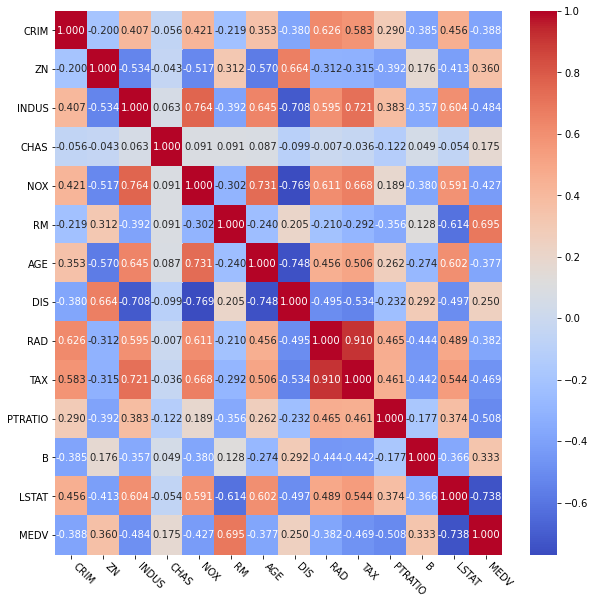

In [11]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),cmap='coolwarm',annot=True, fmt="1.3f")
plt.xticks(rotation=-45, ha = 'left') 

plt.show()

### Creacion del modelo de regresion lineal

In [12]:
X = df[['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT']]
y = df['MEDV']

**Train Test Split**

In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)

**Creando y entrenando el modelo**

In [14]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()

In [15]:
#ajusta el modelo
lm.fit(X_train,y_train)

LinearRegression()

In [16]:
X.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object')

**Evaluamos el modelo**

In [17]:
# print the intercept
print(lm.intercept_)

41.28149654473801


In [18]:
coeff_df = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
CRIM,-0.077558
ZN,0.042031
INDUS,0.091153
CHAS,4.133049
NOX,-19.976557
RM,2.890190
AGE,0.016153
DIS,-1.264747
RAD,0.260171
TAX,-0.011125


**Interpretamos coeficientes:**   
Manteniendo fijos los demás descriptores, aumentar 1 unidad en **CRIM** se asocia con un decrecimiento del 0.077558 en el **MEDV**   
Manteniendo fijos los demás descriptores, aumentar 1 unidad en **ZN** se asocia con un incremento del 0.042031 en el **MEDV**  
Manteniendo fijos los demás descriptores, aumentar 1 unidad en **INDUS** se asocia con un incremento del 0.091153 en el **MEDV**  
Manteniendo fijos los demás descriptores, aumentar 1 unidad en **CHAS** se asocia con un incremento del 4.133049 en el **MEDV**  
Manteniendo fijos los demás descriptores, aumentar 1 unidad en **NOX** se asocia con un decrecimiento del 19.976557 en el **MEDV**  
Manteniendo fijos los demás descriptores, aumentar 1 unidad en **RM** se asocia con un incremento del 2.890190 en el **MEDV**  
Manteniendo fijos los demás descriptores, aumentar 1 unidad en **AGE** se asocia con un incremento del 0.016153 en el **MEDV**  
Manteniendo fijos los demás descriptores, aumentar 1 unidad en **DIS** se asocia con un decrecimiento del 1.264747 en el **MEDV**  
Manteniendo fijos los demás descriptores, aumentar 1 unidad en **RAD** se asocia con un incremento del 0.260171 en el **MEDV**  
Manteniendo fijos los demás descriptores, aumentar 1 unidad en **TAX** se asocia con un decrecimiento del 0.011125 en el **MEDV**  
Manteniendo fijos los demás descriptores, aumentar 1 unidad en **PTRATIO** se asocia con un decrecimiento del 0.880556 en el **MEDV**  
Manteniendo fijos los demás descriptores, aumentar 1 unidad en **B** se asocia con un incremento del 0.007024 en el **MEDV**  
Manteniendo fijos los demás descriptores, aumentar 1 unidad en **LSTAT** se asocia con un decrecimiento del 0.643483 en el **MEDV**  

### Predicciones usando el modelo

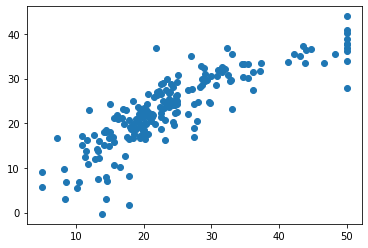

In [19]:
predictions = lm.predict(X_test)

plt.scatter(y_test,predictions)

**Histograma de residuos**

C:\Users\Mafecita\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


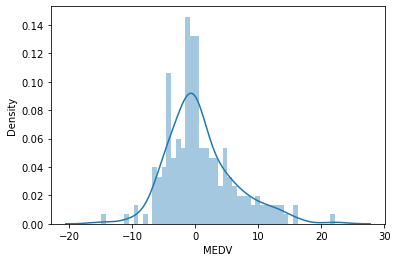

In [20]:
sns.distplot((y_test-predictions),bins=50);

**Evaluación**

In [21]:
from sklearn.metrics import mean_squared_error, r2_score
n = y_test.shape[0]

R2 = r2_score(y_test, predictions)
MSE = mean_squared_error(y_test,predictions)
RSE = np.sqrt( MSE*n/(n-2) )

print("R^2 = {:1.3f}".format(R2) )
print("RSE = {:1.3f}".format(RSE))

R^2 = 0.700
RSE = 5.451


**Conclusiones:**  
R^2 es la proporcion de la varianza explicada, es decir nuestro modelo explica el 70% de la variacion de los datos.  
Tenemos un error estandar residual de 5.451.

**3**. Este ejercicio involucra el uso de regresión lineal múltiple sobre el dataset `Auto`

  a. Grafique una matriz de dispersión que incluya todas las variables en el conjunto de datos.
    
  b. Calcule la matriz de correlaciones entre las variables usando el método `corr()` de Pandas. Luego grafiquela usando `seaborn`.
    
  c. Use la librería de `statsmodels` (específicamente `import statsmodels.formula.api as smf` y luego `smf.ols`)  para realizar una regresión lineal múltiple con *mpg* como respuesta y todas las demás variables, excepto la variable `name`, como predictores. Use el método de summary() para imprimir los resultados. Comenta sobre el resultado:
    
    - ¿Existe una relación entre los predictores y la respuesta?
    - ¿Qué predictores parecen tener una relación estadísticamente significativa con la respuesta?
    - ¿Qué sugiere el coeficiente para la variable del año?
    - Use  multiplicaciones para ajustar  modelos de regresión lineal con efectos de interacción. ¿Alguna interacción parece ser estadísticamente significativa?. 
   
d.  Pruebe algunas transformaciones diferentes de las variables, como $\log{X}, \sqrt{X}, X^2$. Comente los hallazgos. Sug: se puede usar statmodels pero también scikit-learn con `sklearn.preprocessing.PolynomialFeatures` ( con los parámetros interaction_only=True,include_bias = False).
 


**Matriz de dispersion:**

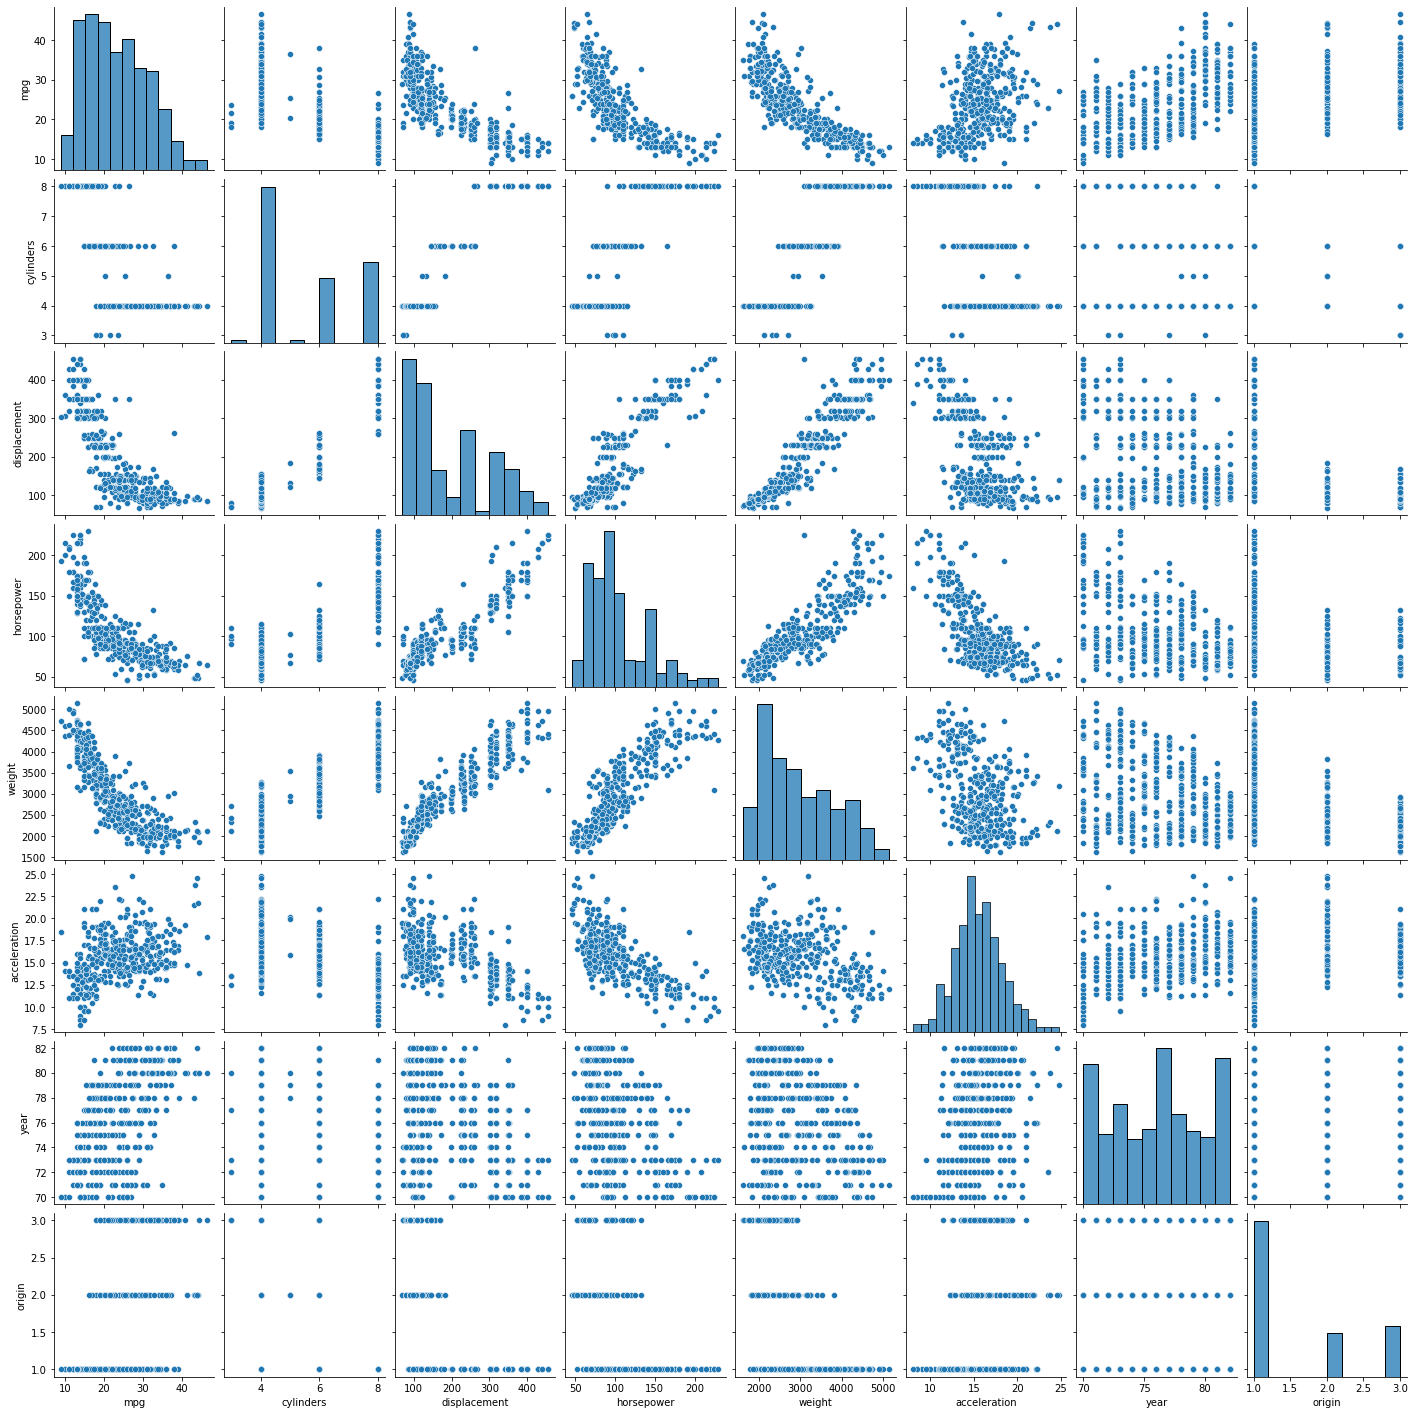

In [22]:
sns.pairplot(auto)

**matriz de correlaciones**

In [23]:
auto.corr()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
mpg,1.000000,-0.777618,-0.805127,-0.778427,-0.832244,0.423329,0.580541,0.565209
cylinders,-0.777618,1.000000,0.950823,0.842983,0.897527,-0.504683,-0.345647,-0.568932
displacement,-0.805127,0.950823,1.000000,0.897257,0.932994,-0.543800,-0.369855,-0.614535
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361,-0.455171
weight,-0.832244,0.897527,0.932994,0.864538,1.000000,-0.416839,-0.309120,-0.585005
acceleration,0.423329,-0.504683,-0.543800,-0.689196,-0.416839,1.000000,0.290316,0.212746
year,0.580541,-0.345647,-0.369855,-0.416361,-0.309120,0.290316,1.000000,0.181528
origin,0.565209,-0.568932,-0.614535,-0.455171,-0.585005,0.212746,0.181528,1.000000


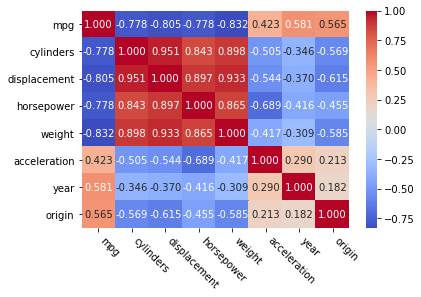

In [24]:
sns.heatmap(auto.corr(),cmap='coolwarm',annot=True, fmt="1.3f")
plt.xticks(rotation=-45, ha = 'left') 
plt.show()

In [25]:
#se ignoro la variable name debido a que es una variable categorica
est = smf.ols('mpg ~ cylinders + displacement + horsepower + weight + acceleration + year + origin', auto).fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     252.4
Date:                Tue, 10 Aug 2021   Prob (F-statistic):          2.04e-139
Time:                        15:04:50   Log-Likelihood:                -1023.5
No. Observations:                 392   AIC:                             2063.
Df Residuals:                     384   BIC:                             2095.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept      -17.2184      4.644     -3.707      0.000     -26.350      -8.087
cylinders       -0.4934      0.323     -1.526      0.128      -1.129       0.142
displacement     0.0199      0.008      2.647      0.008       0.005       0.035
horsepower      -0.0170      0.014     -1.230      0.220      -0.044       0.010
weight          -0.0065      0.001     -9.929      0.000      -0.008      -0.005
acceleration     0.0806      0.099      0.815      0.415      -0.114       0.275
year             0.7508      0.051     14.729      0.000       0.651       0.851
origin           1.4261      0.278      5.127      0.000       0.879       1.973
==============================================================================
Omnibus:                       31.906   Durbin-Watson:                   1.309
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               53.100
Skew:                           0.529   Prob(JB):                     2.95e-12
Kurtosis:                       4.460   Cond. No.                     8.59e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.59e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**¿Existe una relación entre los predictores y la respuesta?**  
Debido a que el valor p es de 2.04e-139, utilizando una prueba F se rechaza la hipotesis nula en la cual todos los coeficientes de los predictores equivalen a 0, por lo cual al menos un predictor es significativo respecto a la variable respuesta. En conclusion, si existe una relación entre los predictores y la respuesta.  

**¿Qué predictores parecen tener una relación estadísticamente significativa con la respuesta?**  
Weight, year, origin,displacement ya que tienen un valor p menor a 0.05.  

**¿Qué sugiere el coeficiente para la variable del año?**  
Sugiere que manteniendo fijos los demás predictores, al pasar un año se incrementan en promedio 0.7508 millas por galon.  

**Use  multiplicaciones para ajustar  modelos de regresión lineal con efectos de interacción. ¿Alguna interacción parece ser estadísticamente significativa?**  


In [26]:
est = smf.ols('mpg ~ cylinders * displacement + horsepower + weight + acceleration + year + origin', auto).fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     264.1
Date:                Tue, 10 Aug 2021   Prob (F-statistic):          9.73e-151
Time:                        15:04:50   Log-Likelihood:                -993.83
No. Observations:                 392   AIC:                             2006.
Df Residuals:                     383   BIC:                             2041.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                 -2.7097      4.686     -0.578      0.563     -11.923       6.504
cylinders                 -2.6962      0.409     -6.584      0.000      -3.501      -1.891
displacement              -0.0775      0.014     -5.474      0.000      -0.105      -0.050
cylinders:displacement     0.0136      0.002      7.907      0.000       0.010       0.017
horsepower                -0.0476      0.013     -3.559      0.000      -0.074      -0.021
weight                    -0.0052      0.001     -8.370      0.000      -0.006      -0.004
acceleration               0.0598      0.092      0.651      0.515      -0.121       0.240
year                       0.7595      0.047     16.044      0.000       0.666       0.853
origin                     0.7087      0.274      2.590      0.010       0.171       1.247
==============================================================================
Omnibus:                       35.211   Durbin-Watson:                   1.456
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               88.581
Skew:                           0.432   Prob(JB):                     5.82e-20
Kurtosis:                       5.162   Cond. No.                     1.03e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.03e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**En este primer modelo observamos que la interaccion entre cylinders y displacement tuvo un valor p menor que 0.05 por lo tanto tienen una interaccion estadísticamente significativa.**

In [27]:
est = smf.ols('mpg ~ cylinders + displacement + horsepower * weight + acceleration + year + origin', auto).fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.862
Model:                            OLS   Adj. R-squared:                  0.859
Method:                 Least Squares   F-statistic:                     298.6
Date:                Tue, 10 Aug 2021   Prob (F-statistic):          1.88e-159
Time:                        15:04:50   Log-Likelihood:                -973.24
No. Observations:                 392   AIC:                             1964.
Df Residuals:                     383   BIC:                             2000.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             2.8757      4.511      0.638      0.524      -5.993      11.744
cylinders            -0.0296      0.288     -0.103      0.918      -0.596       0.537
displacement          0.0059      0.007      0.881      0.379      -0.007       0.019
horsepower           -0.2313      0.024     -9.791      0.000      -0.278      -0.185
weight               -0.0112      0.001    -15.393      0.000      -0.013      -0.010
horsepower:weight  5.529e-05   5.23e-06     10.577      0.000     4.5e-05    6.56e-05
acceleration         -0.0902      0.089     -1.019      0.309      -0.264       0.084
year                  0.7695      0.045     17.124      0.000       0.681       0.858
origin                0.8344      0.251      3.320      0.001       0.340       1.329
==============================================================================
Omnibus:                       40.936   Durbin-Watson:                   1.474
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               73.199
Skew:                           0.629   Prob(JB):                     1.27e-16
Kurtosis:                       4.703   Cond. No.                     1.23e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.23e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**En este primer modelo observamos que la interaccion entre horsepower y weight tuvo un valor p menor que 0.05 por lo tanto tienen una interaccion estadísticamente significativa.**

In [28]:
est = smf.ols('mpg ~ cylinders + displacement + horsepower + weight + acceleration * year + origin', auto).fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     242.6
Date:                Tue, 10 Aug 2021   Prob (F-statistic):          7.97e-145
Time:                        15:04:50   Log-Likelihood:                -1007.8
No. Observations:                 392   AIC:                             2034.
Df Residuals:                     383   BIC:                             2069.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            97.6200     20.829      4.687      0.000      56.666     138.574
cylinders            -0.2164      0.315     -0.687      0.492      -0.835       0.403
displacement          0.0088      0.007      1.171      0.242      -0.006       0.024
horsepower           -0.0269      0.013     -2.012      0.045      -0.053      -0.001
weight               -0.0059      0.001     -9.232      0.000      -0.007      -0.005
acceleration         -7.1818      1.290     -5.567      0.000      -9.718      -4.645
year                 -0.7462      0.270     -2.767      0.006      -1.276      -0.216
acceleration:year     0.0946      0.017      5.645      0.000       0.062       0.127
origin                1.2630      0.269      4.693      0.000       0.734       1.792
==============================================================================
Omnibus:                       21.826   Durbin-Watson:                   1.416
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               32.214
Skew:                           0.417   Prob(JB):                     1.01e-07
Kurtosis:                       4.130   Cond. No.                     4.26e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.26e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**En este primer modelo observamos que la interaccion entre acceleration y year tuvo un valor p menor que 0.05 por lo tanto tienen una interaccion estadísticamente significativa.**

In [29]:
est = smf.ols('mpg ~ cylinders + displacement + horsepower + weight + acceleration + year * origin', auto).fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     227.9
Date:                Tue, 10 Aug 2021   Prob (F-statistic):          1.60e-140
Time:                        15:04:50   Log-Likelihood:                -1018.0
No. Observations:                 392   AIC:                             2054.
Df Residuals:                     383   BIC:                             2090.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        8.4915      9.044      0.939      0.348      -9.290      26.273
cylinders       -0.5042      0.319     -1.579      0.115      -1.132       0.123
displacement     0.0157      0.008      2.081      0.038       0.001       0.030
horsepower      -0.0140      0.014     -1.025      0.306      -0.041       0.013
weight          -0.0064      0.001     -9.851      0.000      -0.008      -0.005
acceleration     0.0918      0.098      0.941      0.348      -0.100       0.284
year             0.4189      0.113      3.723      0.000       0.198       0.640
origin         -14.0456      4.699     -2.989      0.003     -23.284      -4.807
year:origin      0.1989      0.060      3.298      0.001       0.080       0.317
==============================================================================
Omnibus:                       31.636   Durbin-Watson:                   1.346
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               50.301
Skew:                           0.542   Prob(JB):                     1.19e-11
Kurtosis:                       4.381   Cond. No.                     1.87e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.87e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**En este primer modelo observamos que la interaccion entre year y origin tuvo un valor p menor que 0.05 por lo tanto tienen una interaccion estadísticamente significativa.**

In [30]:
auto.columns[1:7]

Index(['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration',
       'year'],
      dtype='object')

In [31]:
cyl_log = np.log(auto['cylinders'])
dis_s2 = np.sqrt(auto['displacement'])
wei_2 = (auto['weight'])^2

In [32]:
auto.insert(9,'cyl_log',cyl_log)
auto.insert(10,'dis_s2',dis_s2)
auto.insert(11,'wei_2',wei_2)
auto

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name,cyl_log,dis_s2,wei_2
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu,2.079442,17.521415,3506
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320,2.079442,18.708287,3695
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite,2.079442,17.832555,3438
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst,2.079442,17.435596,3435
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino,2.079442,17.378147,3451
...,...,...,...,...,...,...,...,...,...,...,...,...
392,27.0,4,140.0,86.0,2790,15.6,82,1,ford mustang gl,1.386294,11.832160,2788
393,44.0,4,97.0,52.0,2130,24.6,82,2,vw pickup,1.386294,9.848858,2128
394,32.0,4,135.0,84.0,2295,11.6,82,1,dodge rampage,1.386294,11.618950,2293
395,28.0,4,120.0,79.0,2625,18.6,82,1,ford ranger,1.386294,10.954451,2627


In [33]:
est = smf.ols('mpg ~ cylinders + displacement + horsepower + weight + acceleration + year + origin +  cyl_log +  dis_s2 +wei_2', auto).fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.855
Model:                            OLS   Adj. R-squared:                  0.851
Method:                 Least Squares   F-statistic:                     224.0
Date:                Tue, 10 Aug 2021   Prob (F-statistic):          8.78e-153
Time:                        15:04:50   Log-Likelihood:                -983.21
No. Observations:                 392   AIC:                             1988.
Df Residuals:                     381   BIC:                             2032.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        6.5418      6.161      1.062      0.289      -5.573      18.656
cylinders       -3.0074      1.435     -2.096      0.037      -5.829      -0.186
displacement     0.1907      0.021      8.971      0.000       0.149       0.233
horsepower      -0.0457      0.013     -3.515      0.000      -0.071      -0.020
weight           0.0883      0.077      1.142      0.254      -0.064       0.240
acceleration    -0.0623      0.092     -0.678      0.498      -0.243       0.119
year             0.7882      0.046     16.973      0.000       0.697       0.880
origin           0.3238      0.278      1.163      0.245      -0.224       0.871
cyl_log         18.3782      8.012      2.294      0.022       2.625      34.132
dis_s2          -5.6811      0.670     -8.481      0.000      -6.998      -4.364
wei_2           -0.0924      0.077     -1.195      0.233      -0.244       0.060
==============================================================================
Omnibus:                       31.239   Durbin-Watson:                   1.423
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               63.048
Skew:                           0.453   Prob(JB):                     2.04e-14
Kurtosis:                       4.744   Cond. No.                     2.57e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.57e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**Conclusiones:**  
**1** log(cylinders) tiene un poco mas de significancia que cylinders ya que tiene un valor p menor.  
**2** Al aumentar en 1 el logaritmo de cylinders, aumentan 18.37 millas por galon en contraposicion a cylinders que las disminuia en 3.  
**3** sqrt(displacement) tiene mucha significancia ya que el valor p es menor a 0.001 al igual que el de displacement.  
**4** Al aumentar en 1 la raiz de displacement, disminuyen 5.68 millas por galon en contraposicion a displacement que las aumentaba 0.19  
**5** (weight)^2 no tiene significancia al igual que weight, ya que ambos tienen un valor p mayor que 0.05.  
**6** Al aumentar en 1 el cuadrado de weight, disminuyen 0.0924 millas por galon en contraposicion a weight que las aumentaba en 0.08.   